In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [47]:
np.random.seed(42)
pl_template = []

# Xem xét và xử lý những thiếu sót (nếu có ) về tập dữ liệu final để đưa ra các thuật toán học máy hiệu quả

In [48]:
data=pd.read_csv(r'..\Preprocessing_Data\final_data.csv')
data.sample(5)

,title,company,requirement,salary,technical_skill,location,working_time,image_url,job_url
1153,Middle JavaScript Developer,AZoom Vietnam,NaN,Negotiable,"['javascript', 'vuejs', 'nodejs', 'mysql', 'gi...","Từ Liêm, Hà Nội",Full Time,https://www.itjobs.com.vn/upload/Employer/AZoo...,https://www.itjobs.com.vn/en/job/80798/middle-...
6166,Full-Stack Developer (.net/reactjs),FPT,NaN,Negotiable,"['azure', 'html', 'angular', 'c#', 'net', 'rea...",Vietnam,Full-time,https://nodeflair.com/api/v2/companies/723.png,https://nodeflair.com/jobs/fpt-full-stack-deve...
1582,Senior Front-end Developer,Unifiedpost,"['Skill Needed', 'Excellent verbal and written...",Negotiable,"['javascript', 'c#', 'aspnet', 'css', 'bootstr...","Binh Thanh, TP Hồ Chí Minh",Full Time,https://www.itjobs.com.vn/upload/Employer/Unif...,https://www.itjobs.com.vn/en/job/80208/senior-...
2753,IT Security - Infrastructure Section,Generali Vietnam Life Insurance,[],Negotiable,"['system', 'product', 'agile']","43 – 45 Tu Xuong, Vo Thi Sau Ward, District 3,...",Full time,https://itviec.com/rails/active_storage/repres...,https://itviec.com/it-jobs/it-security-infrast...
6302,Internship Tester (French),Capgemini,NaN,Negotiable,"['oop', 'java', 'c#', 'python']",Vietnam,Full-time,https://nodeflair.com/api/v2/companies/375.png,https://nodeflair.com/jobs/capgemini-internshi...


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6891 entries, 0 to 6890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            6891 non-null   object
 1   company          6891 non-null   object
 2   requirement      5437 non-null   object
 3   salary           6891 non-null   object
 4   technical_skill  6891 non-null   object
 5   location         6891 non-null   object
 6   working_time     6891 non-null   object
 7   image_url        6891 non-null   object
 8   job_url          6891 non-null   object
dtypes: object(9)
memory usage: 484.7+ KB


**$\implies$ Ở bộ dữ liệu trên chúng ta sẽ chú trọng vào technical_skill để dự đoán và các thuộc tính cần thiết để đưa lên làm giao diện web như: title,company,salary,location,image_url,job_url**

In [50]:
data=data.drop(['requirement'],axis=1)

**Xét xem có các công việc nào có title và company giống nhau để xử lý chúng. Vì dữ liệu được thu thập trong cùng 1 thời điểm nên 2 công việc có title,company trùng nhau sẽ là 2 công việc trùng lặp nên cần loại bỏ 1 cái**

In [51]:
data.title=data.title.str.lower()
data.company=data.company.str.lower()

In [52]:
print('Số công việc bị trùng lập: ',data.duplicated(subset=['title','company']).sum())
data=data.drop_duplicates(subset=['title','company']) #loại bỏ các công việc trùng lặp

Số công việc bị trùng lập:  2419


In [53]:
data.shape

(4472, 8)

# Xây dựng mô hình máy học
**Các Bước Thực Hiện:**
* Vector Hóa -->Giảm Chiều Dữ Liệu--> Phân Cụm

## Vector Hóa

### Phân tích dữ liệu techical_skills để tìm ra phương pháp Vector Hóa phù hợp

**Xây dụng hàm định dạng lại data skill**

In [54]:
import re
def text_preprocessing(skill_string):
    pattern = r'[()\/\\.]'
    text= " ".join(list(set(map(lambda x:x.strip(),skill_string.strip("[]").replace("'", "").replace(",", "").lower().split()))))
    text=re.sub(pattern,' ',text)
    text=re.sub(r'\s+',' ',text)
    return text

In [55]:
data['technical_skill']=data['technical_skill'].apply(text_preprocessing)

**Dùng countVectorizer để vẽ tần suất của các skill**

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv_model=cv.fit(data['technical_skill'])

In [57]:
words_df=pd.DataFrame(cv_model.transform(data['technical_skill']).toarray(),columns=cv_model.get_feature_names_out())
words_df.sample(5)

,2d,3d,45,abap,acceptance,access,acquia,active,activemq,ad,...,xss,yaml,yarn,yii,yii2,yocto,zabbix,zend,zeplin,zookeeper
3668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
top_20_skills=words_df.sum(axis=0).sort_values(ascending=False).head(20) #top 20 kỹ năng yêu cầu nhiều nhất

C:\Users\PC\AppData\Local\Temp\ipykernel_14716\1751509277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_skills.values,y=top_20_skills.index,palette='viridis')


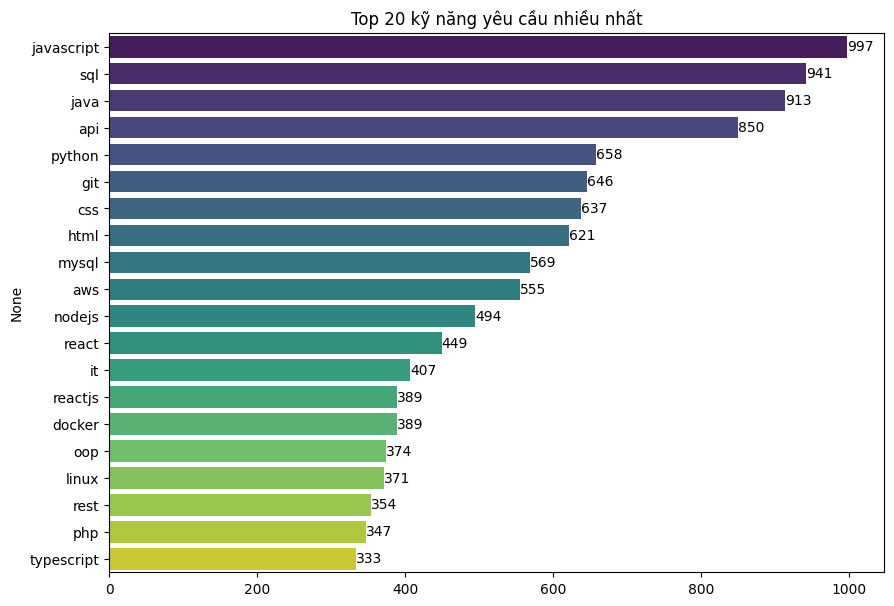

In [60]:
plt.figure(figsize=(10,7))
sns.barplot(x=top_20_skills.values,y=top_20_skills.index,palette='viridis')
for index, value in enumerate(top_20_skills.values):
    plt.text(value, index, f'{value}', va='center')
plt.title('Top 20 kỹ năng yêu cầu nhiều nhất')
plt.show()

**$\implies$ Ta thấy hầu hết các skill yêu cầu đều là web nên nếu ta dùng TF-IDF thì nhóm công việc về web sẽ bị thiên vị nên ta sẽ dùng coutVectorizer để các skill đều có mức độ quan trọng như nhau**

## Giảm chiều dữ liệu bằng PCA

In [61]:
from sklearn.decomposition import PCA

Text(0.5, 0, 'number of components')

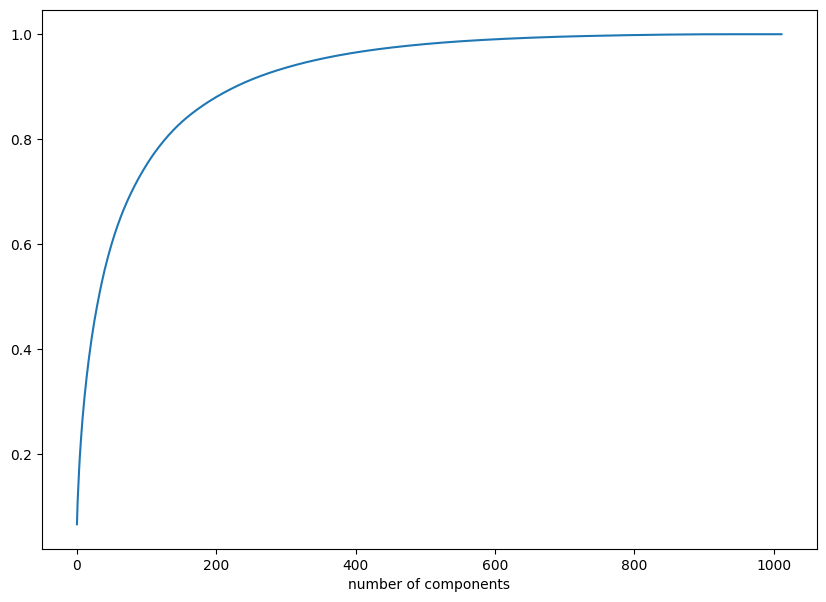

In [62]:
pca_temp = PCA()
pca_temp.fit(words_df)
cumsum_var_ratio = np.cumsum(pca_temp.explained_variance_ratio_)
plt.figure(figsize=(10,7))
plt.plot(cumsum_var_ratio)
plt.xlabel('number of components')

**$\implies$ Dựa vào biểu đồ tổng cộng dồn phương sai ta có thể quyết định được mức độ phương sai giữ lại khoảng 90% -> 95% vì giữa 95 với 90 số lượng component chênh lệch không nhiều nên ta sẽ chọn 95 để dữ liệu toàn vẹn hơn**

In [63]:
n_component_95=0
for n_component in range(0,cumsum_var_ratio.shape[0]):
    if cumsum_var_ratio[n_component]>=0.95:
        n_component_95=n_component+1
        break

In [64]:
final_pca=PCA(n_component_95)
final_pca.fit(words_df)
words_pca=final_pca.transform(words_df)
words_pca.shape

(4472, 341)

**Đồ thị phân bố của từng điểm với 2 thuộc tính có phương sai cao nhất**

C:\Users\PC\AppData\Local\Temp\ipykernel_14716\1211298887.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=words_pca[:,0],y=words_pca[:,1],palette='viridis')


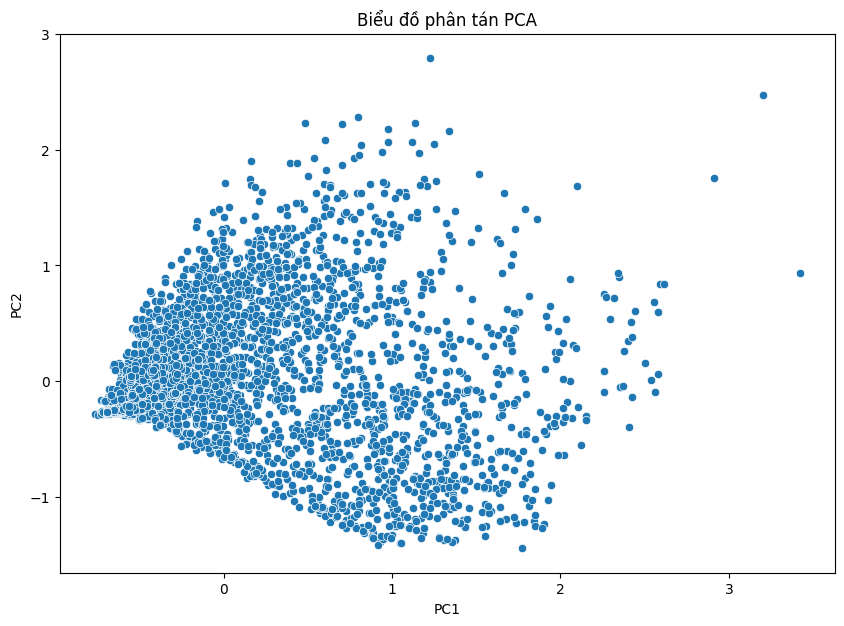

In [65]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=words_pca[:,0],y=words_pca[:,1],palette='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biểu đồ phân tán PCA')
plt.show()

In [66]:
pl_template.append(('PCA',final_pca))

## Phân Cụm Dữ liệu
* Dùng KMeans,Spectral Clustering,Hierarchical Clustering để phân cụm dữ liệu
* Dùng silhouette_score,DBI để đánh giá mô hình
* **Note: silhouette_score đánh giá mức độ tương đồng của các điểm dữ liệu trong cùng một cụm (cohesion) so với các cụm khác (separation).Giá trị silhouette_score càng cao càng tốt**
* **Note: DBI đánh giá mức độ "gần gũi" giữa các cụm với nhau. Chỉ số DBI càng thấp thì cụm càng tốt.**

### Hierarchical Clustering (bottom up)

**Phân tích cây dendrogram để tìm ra số cụm phù hợp**

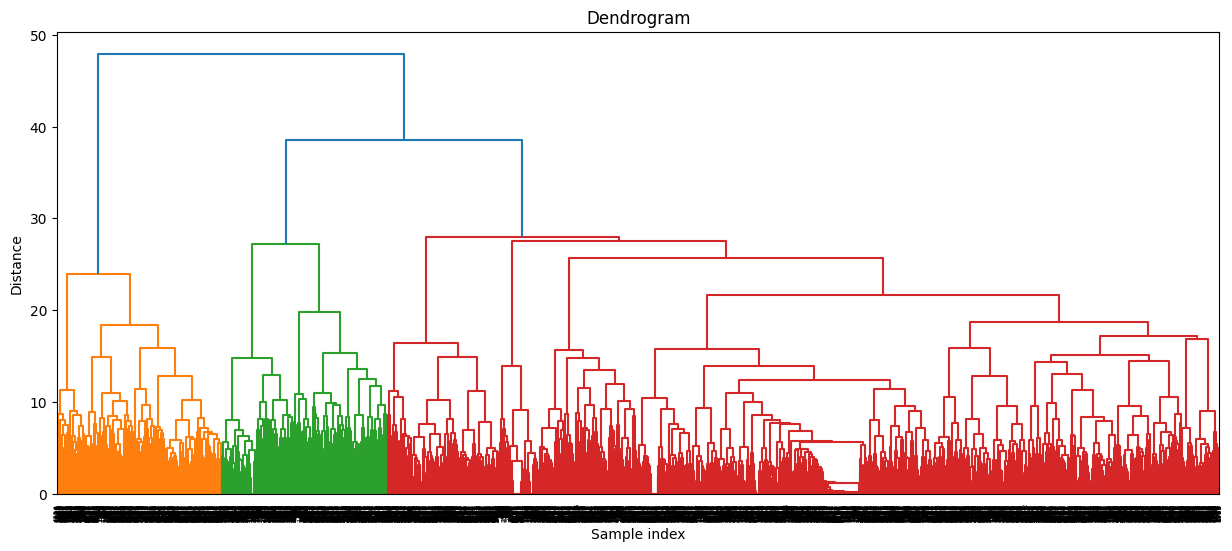

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Tạo linkage matrix sử dụng phương pháp 'ward'
Z = linkage(words_pca, method='ward')

# Vẽ biểu đồ dendrogram
plt.figure(figsize=(15, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

**Biểu đồ dendrogram cho ta thấy khi cắt ở khoảng cách 20 sẽ ra 9 clusters chúng ta chọn khoảng cách này vì các cluster sẽ có kích thước tương đồng không quá lệch**

In [68]:
max_distance = 20
hierarchical_clusters = fcluster(Z, max_distance, criterion='distance')
print('Số cụm được tạo ra: ',len(np.unique(hierarchical_clusters)))

Số cụm được tạo ra:  9


**Xem điểm của mô hình**

In [69]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [70]:
silhouette_hierarchical = silhouette_score(words_pca, hierarchical_clusters)
dbi_hierarchical = davies_bouldin_score(words_pca, hierarchical_clusters)
print(f'Silhouette Score: {silhouette_hierarchical}')
print(f'Davies Bouldin Score: {dbi_hierarchical}')

Silhouette Score: -0.023240756392249984
Davies Bouldin Score: 4.175960449640741


### Kmeans

In [71]:
from sklearn.cluster import KMeans

**Tìm số cụm tối ưu nhất cho Kmeans bằng PP Elbow và Silhouette Score từ 6 đến 19 cụm**

In [72]:
wsse_list = []
silhouette_scores=[]
K_list = range(6, 20)

for k in K_list:
    np.random.seed(42)
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=1000)

    # Fit the input data
    kmeans.fit(words_pca)

    # Append the WSSE to the wsse_list
    wsse_list.append(kmeans.inertia_)

    # Append the silhouette score to the silhouette_scores list
    silhouette_scores.append(silhouette_score(words_pca, kmeans.labels_))


#### Tìm bằng Silhouette Score

Text(0.5, 1.0, 'Silhouette Score')

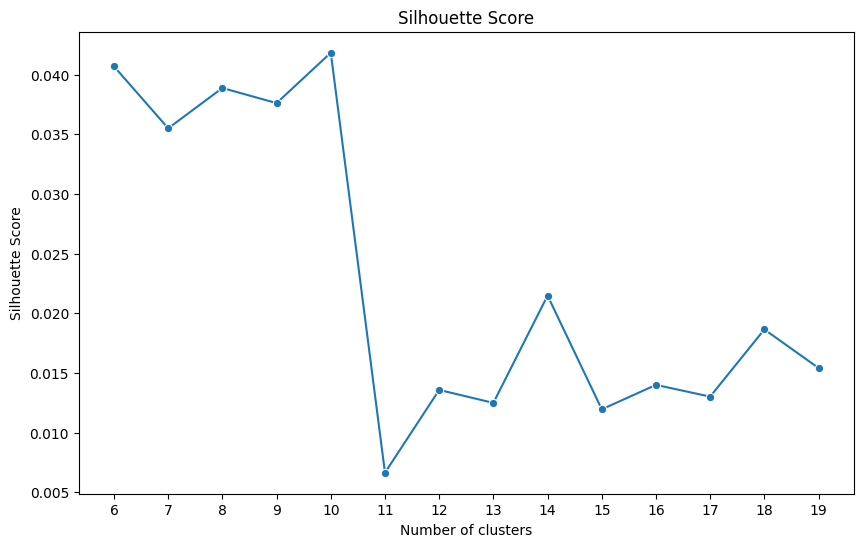

In [73]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=K_list, y=silhouette_scores, marker='o')
plt.xticks(K_list)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

#### Tìm bằng Elbow curve

Text(0.5, 1.0, 'Elbow curve')

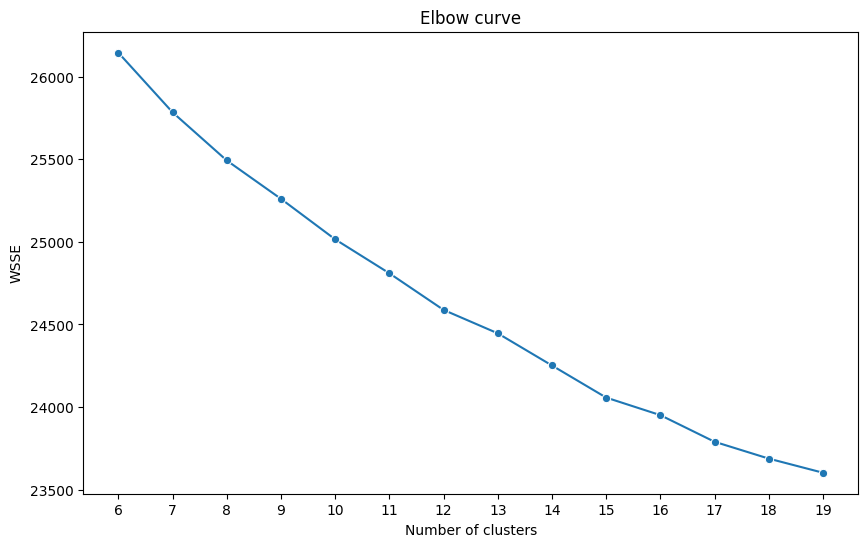

In [74]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=K_list, y=wsse_list, marker='o')
plt.xticks(K_list)
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.title('Elbow curve')

**$\implies$ Theo cả 2 đồ thị ta thấy 10 cụm là con số lý tưởng vì có silhouette score ổn và error cũng không quá tệ**

In [75]:
final_kmeans = KMeans(n_clusters=10, random_state=42, n_init=100, max_iter=1000)
final_kmeans.fit(words_pca)

KMeans(max_iter=1000, n_clusters=10, n_init=100, random_state=42)

In [76]:
silhouette_kmeans = silhouette_score(words_pca, final_kmeans.labels_)
dbi_kmeans = davies_bouldin_score(words_pca, final_kmeans.labels_)
print(f'Silhouette Score: {silhouette_kmeans}')
print(f'Davies Bouldin Score: {dbi_kmeans}')

Silhouette Score: 0.04182800120565121
Davies Bouldin Score: 3.4927193500880307


### Lựa chọn thuật toán phân cụm phù hợp

**Vì cả Silhouette Score và Davies Bouldin Score của kmeans đều cho kết quả tốt hơn nên ta sẽ chọn kmeans**

**Đồ thị sau phân lớp**

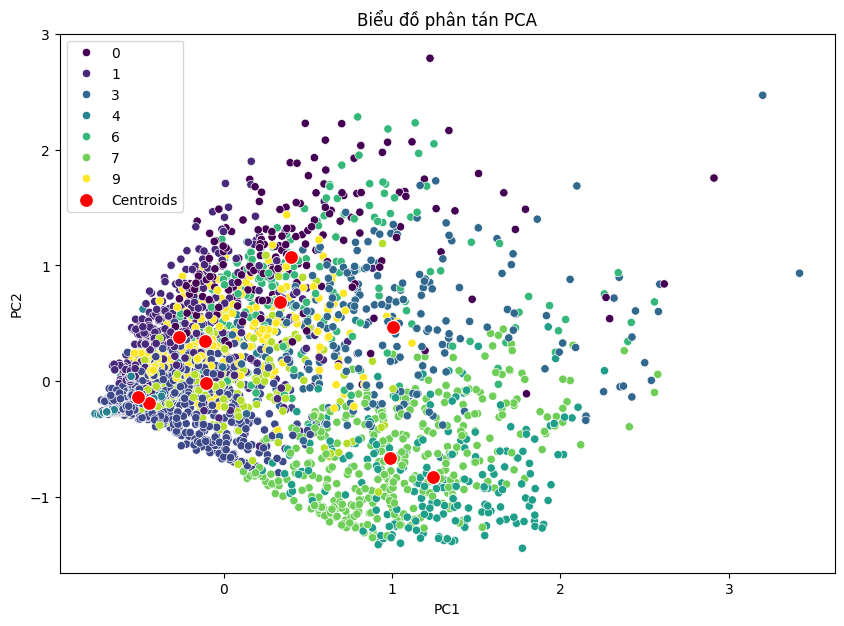

In [77]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=words_pca[:,0],y=words_pca[:,1],hue=final_kmeans.labels_,palette='viridis')
sns.scatterplot(x=final_kmeans.cluster_centers_[:,0],y=final_kmeans.cluster_centers_[:,1],color='red',s=100,label='Centroids',markers='+')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biểu đồ phân tán PCA')
plt.show()

**Gán Cluster vào dữ liệu**

In [78]:
data['cluster']=final_kmeans.labels_ #thêm cột cluster vào dữ liệu
data.head()

,title,company,salary,technical_skill,location,working_time,image_url,job_url,cluster
0,senior c# fullstack developer,tog recruitment,Up to 70000000VND,db core blazor ms aws devops sql cosmos c# rea...,"Quận 3, TP Hồ Chí Minh",Full Time,https://www.itjobs.com.vn/upload/Employer/TOG-...,https://www.itjobs.com.vn/en/job/81250/senior-...,9
1,senior java backend developer,dr.joy,Up to 2000,database spring design oop java boot mongodb,"Cầu Giấy, Hà Nội",Full Time,https://www.itjobs.com.vn/upload/Employer/Dr.J...,https://www.itjobs.com.vn/en/job/81724/senior-...,6
2,salesforce marketing cloud consultant,clever age,Negotiable,salesforce javascript,"Quận 3, TP Hồ Chí Minh",Full Time,https://www.itjobs.com.vn/upload/Employer/Clev...,https://www.itjobs.com.vn/en/job/81725/salesfo...,2
3,frontend developer,fastboy marketing,Negotiable,javascript scss html5 css3 reactjs uiux sass,"Tan Phu, TP Hồ Chí Minh",Full Time,https://www.itjobs.com.vn/upload/Employer/Fast...,https://www.itjobs.com.vn/en/job/81726/fronten...,2
4,senior product owner,one mount group,Negotiable,jira development product,"Hoàn Kiếm, Hà Nội",Full Time,https://www.itjobs.com.vn/upload/Employer/One-...,https://www.itjobs.com.vn/en/job/81727/senior-...,2


In [79]:
data.cluster.value_counts()

cluster
2    1814
1     438
7     419
9     403
8     276
6     264
3     246
5     208
0     203
4     201
Name: count, dtype: int64

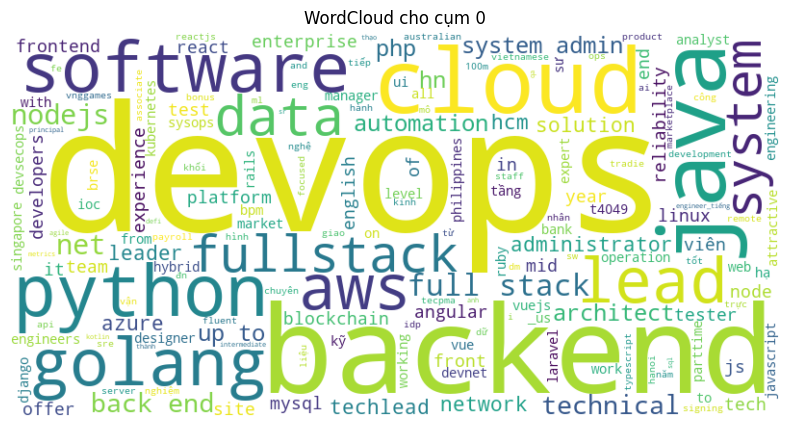

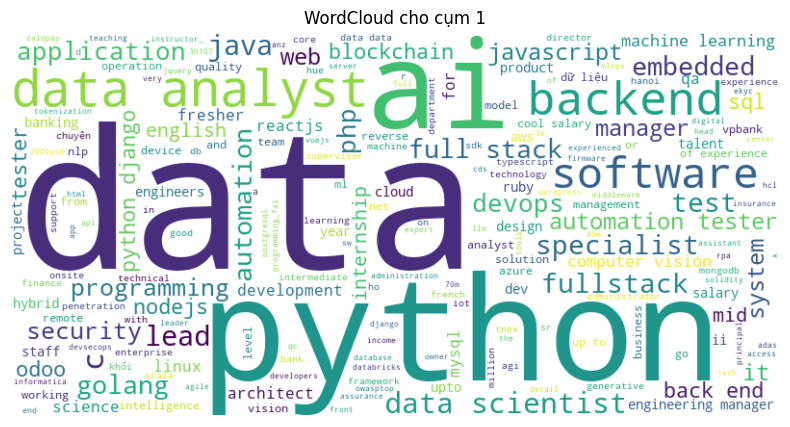

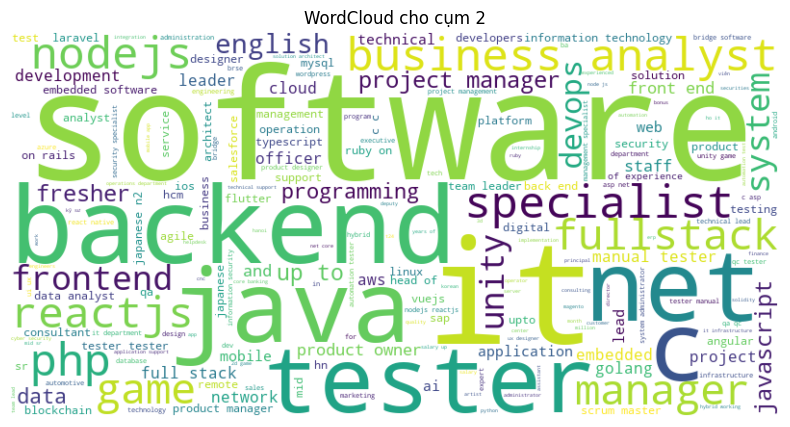

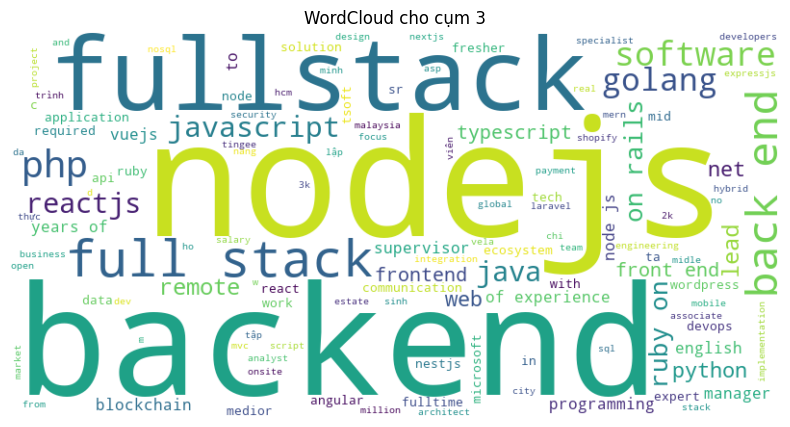

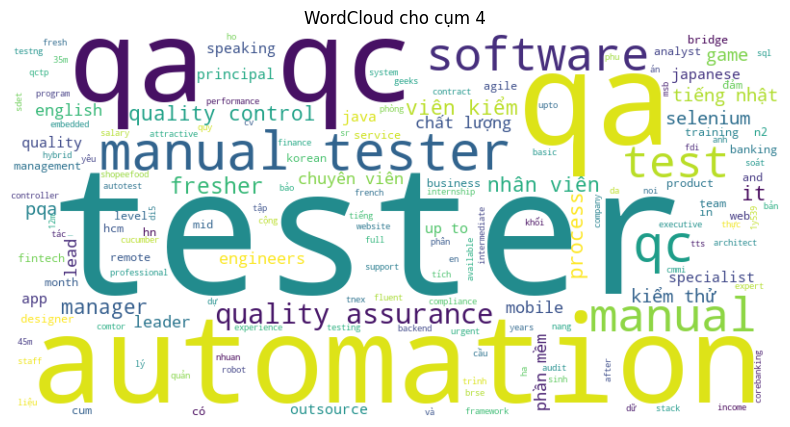

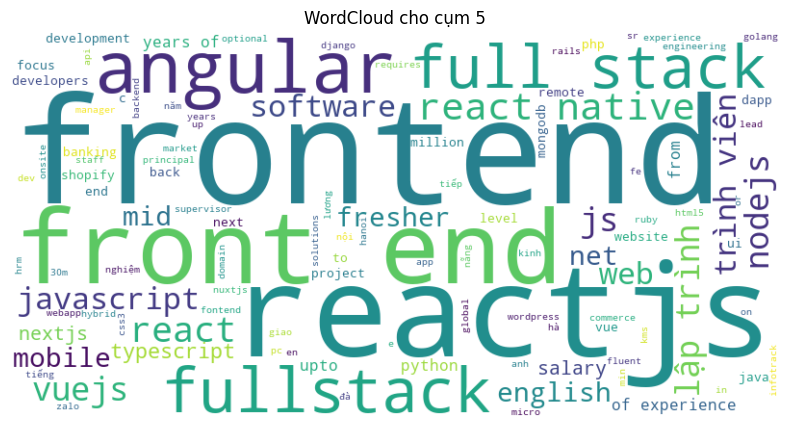

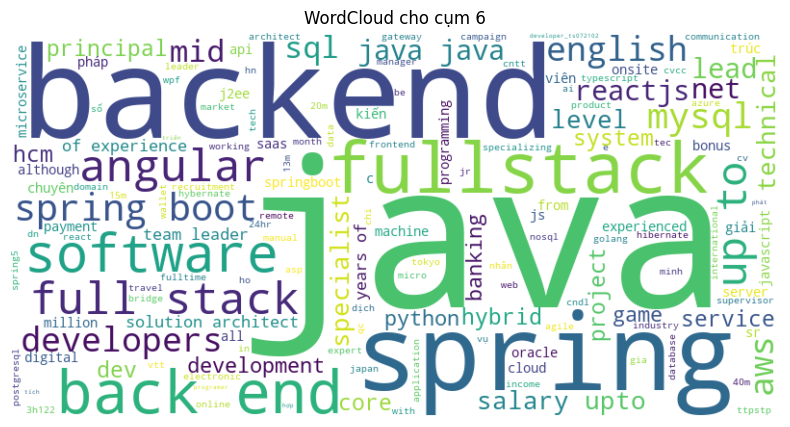

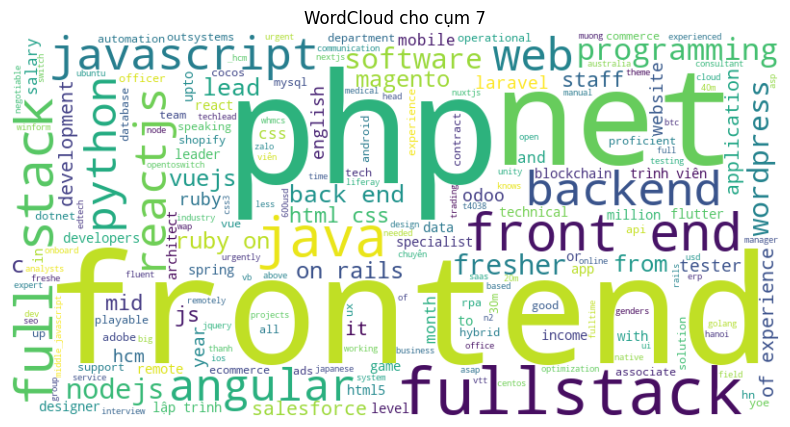

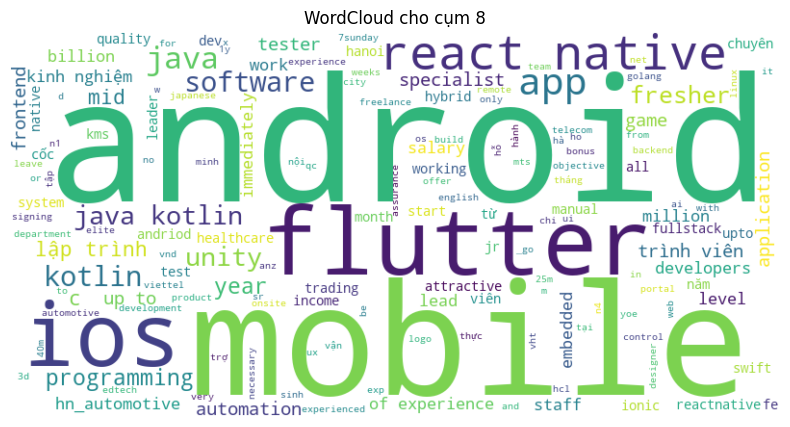

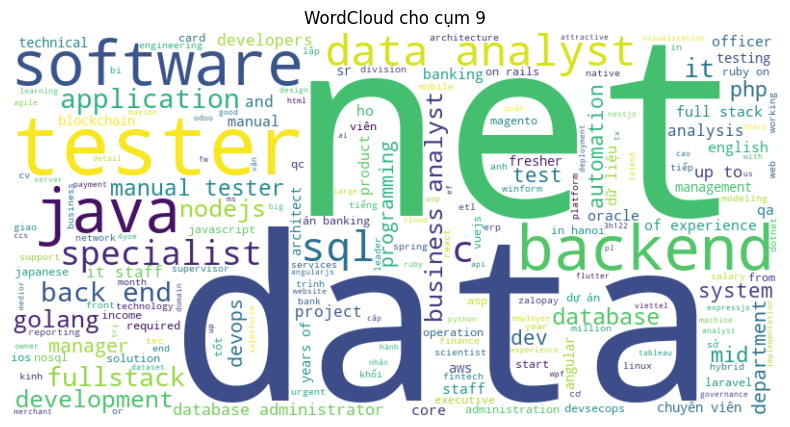

In [80]:
from wordcloud import WordCloud
def plot_wordcloud(data, cluster_num):
    # Lấy tất cả các tiêu đề thuộc cluster_num
    text = ' '.join(data[data['cluster'] == cluster_num]['title'])
    
    # Tạo WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=['junior','intern','middle','developer','senior','programmer','engineer']).generate(text)
    
    # Hiển thị WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud cho cụm {cluster_num}')
    plt.show()

# Vẽ WordCloud cho từng cụm
clusters = sorted(data['cluster'].unique())
for cluster in clusters:
    plot_wordcloud(data, cluster)

* **Cụm 0: Devops**
* **Cụm 1: Data/AI (nhóm công việc chuyên xây dựng mô hình học máy)**
* **Cụm 2: BackEnd Software**
* **Cụm 3: BackEnd Web**
* **Cụm 4: Tester**
* **Cụm 5: FrontEnd**
* **Cụm 6: Java (nhóm công việc liên quan đến java)**
* **Cụm 7: FullStack**
* **Cụm 8: Mobile**
* **Cụm 9: Analyst (nhóm công việc chuyên phân tích)**

In [81]:
pl_template.append(('KMeans',final_kmeans))

# Đánh giá mô hình và xây dựng pipeline

* **Vì chúng ta chọn kmeans nên chúng ta sẽ đánh giá bằng WSSE,Silhouette và Davies Bouldin**

## Dựa trên WSSE,Silhouette và Davies Bouldin

In [82]:
print(f'Silhouette Score: {silhouette_kmeans}')
print(f'Davies Bouldin Score: {dbi_kmeans}')
print(f'WSSE: {final_kmeans.inertia_}')

Silhouette Score: 0.04182800120565121
Davies Bouldin Score: 3.4927193500880307
WSSE: 25014.838087206343


## Dựa trên một vài mẫu CV đã thu thập

**Xây dụng PipeLine**

In [83]:
pipeline_model = Pipeline(pl_template)

**Trích văn bản từ cv**

In [84]:

from pdf2image import convert_from_path, exceptions as pdf2image_exceptions
import pytesseract
from pytesseract import image_to_string
pytesseract.pytesseract.tesseract_cmd = r'..\..\job-recommendation-be\lib\Tesseract-OCR\tesseract.exe'

In [85]:
import os
text = ""
pdf_path = os.path.join('testCV.pdf')
images = convert_from_path(pdf_path,poppler_path=r'..\..\job-recommendation-be\lib\poppler-24.02.0\Library\bin')
for img in images:
    text += image_to_string(img)
text

'Khanh Quoc |ran\n\nDATA SCIENTIST + RESEARCH ENGINEER - TEACHING ASSISTANT\nSamsora Riverside Apartment, Binh Thang ward, Di An town, Binh Duong province, Vietnam\n@ (+84) 971-958-350 | SZkhanhtq@uit.edu.vn | kh4nh12 | @kh4nhi2 | t& Khanh Quoc Tran\n\n“As a data scientist, I’m interested in investigating Big Data by utilizing Data Analyst and state-of-the-art\nMachine Learning methods to solve challenging tasks related to media products such as Data Mining,\nNatural Language Processing, and Social Analysis, which provide powerful visualization tools and predictive\nmodels for leaders and organizations to make the right decisions at the right time.”\n\nEducation\nVNUHCM - University of Information Technology Ho Chi Minh City, Vietnam\nBACHERLOR OF DaTA SCIENCE; GPA: 3.27/4.0 Sep. 2018 - Sep. 2022\n\nThesis: Hate and Offensive Detection on Vietnamese Social Media Text Using PhoBERT-CNN Model\nResearch interest: Natural Language Processing (NLP), Information Extraction, Emotions and Sent

**Các Công Việc Dự Đoán Từ Text Đã Trích Xuất**

In [86]:
data_res=data[data['cluster']==pipeline_model.predict(cv_model.transform([text]).toarray())[0]]
data_res.head()

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,title,company,salary,technical_skill,location,working_time,image_url,job_url,cluster
17,senior backend developer,modec,Negotiable,postgresql django mysql microservices reactjs ...,"Vũng Tàu, Bà Rịa-Vũng Tàu",Full Time,https://www.itjobs.com.vn/upload/Employer/MODE...,https://www.itjobs.com.vn/en/job/81711/senior-...,1
58,web application developer,pasona tech vietnam,Negotiable,wordpress lambda laravel aws nodejs nestjs ent...,"Tân Bình, TP Hồ Chí Minh",Full Time,https://www.itjobs.com.vn/upload/Employer/Paso...,https://www.itjobs.com.vn/en/job/81528/web-app...,1
106,it support specialist,bosch global software technologies (bgsv),Negotiable,ms sql perl itil oracle powershell python,"Tân Bình, TP Hồ Chí Minh",Full Time,https://www.itjobs.com.vn/upload/Employer/Bosc...,https://www.itjobs.com.vn/en/job/81654/it-supp...,1
111,senior automation tester,capgemini vietnam,Negotiable,testng devops bdd java maven jenkins jira cucu...,"Phú Nhuận, TP Hồ Chí Minh",Full Time,https://www.itjobs.com.vn/upload/Employer/Capg...,https://www.itjobs.com.vn/en/job/81605/senior-...,1
118,data science manager,asia commercial bank - acb,Negotiable,ms word machine excel deep learning r python p...,"Quận 3, TP Hồ Chí Minh",Full Time,https://www.itjobs.com.vn/upload/Employer/Asia...,https://www.itjobs.com.vn/en/job/81648/data-sc...,1


**Tìm ra 15 công việc gần nhất với CV trong cụm đã phân bằng khoảng cách euclid**

In [87]:
nearest_jobs=[]
text_transformed=cv_model.transform([text]).toarray()
for vec in cv_model.transform(data_res['technical_skill'].apply(text_preprocessing)).toarray():
        nearest_jobs.append(np.linalg.norm(vec-text_transformed[0]))
nearest_jobs=np.array(nearest_jobs)
final_rs=data_res.iloc[np.argsort(nearest_jobs)[:15],:]

In [88]:
final_rs

,title,company,salary,technical_skill,location,working_time,image_url,job_url,cluster
119,data science director,techcombank,Negotiable,learning data ms apache sql java c++ spark c s...,"Hai Bà Trưng, Hà Nội",Full Time,https://www.itjobs.com.vn/upload/Employer/Tech...,https://www.itjobs.com.vn/en/job/81650/data-sc...,1
5703,ai engineer,est rouge,$500 - $2000,big data business machine intelligence learnin...,"Nguyen Huu An, Nai Hien Dong, Son Tra, Da Nang...",Full-time,https://images.vietnamworks.com/img/company-de...,https://www.vietnamworks.com/ai-engineer--1764...,1
3841,intern ai developer,công ty cổ phần vnext software,Up to 4 million,learning vision data pytorch nlp artificial r ...,"- Hanoi: 18th and 19th floors, Central Point b...",Fulltime,https://cdn-new.topcv.vn/unsafe/80x/https://st...,https://www.topcv.vn/viec-lam/intern-ai-develo...,1
5616,machine learning – a.i. engineer,"microtec vietnam co., ltd",Negotiable,data artificial c++ c machine intelligence lea...,"198 Tran Quang Khai Str, Hoan Kiem Dist., Hanoi",Full-time,https://www.vietnamworks.com/_next/image?url=h...,https://www.vietnamworks.com/machine-learning-...,1
5637,data engineer,unilever vietnam,Negotiable,big data sql machine learning python,"156 Nguyen Luong Bang, Tan Phu, District 7, Ho...",Full-time,https://www.vietnamworks.com/_next/image?url=h...,https://www.vietnamworks.com/data-engineer--17...,1
2986,python back-end developer,công ty tnhh lg cns việt nam,Negotiable,learning big data devops java artificial linux...,"- Hanoi: 15th Floor, Keangnam Landmark 72, Nam...",Fulltime,https://cdn-new.topcv.vn/unsafe/80x/https://st...,https://www.topcv.vn/viec-lam/python-back-end-...,1
4060,data engineer (banking project),công ty cổ phần gogroup,Up to 25 million,learning db pentaho data java it spark cassand...,"- Hanoi: 18 Le Van Luong, Cau Giay",Fulltime,https://cdn-new.topcv.vn/unsafe/80x/https://st...,https://www.topcv.vn/viec-lam/data-engineer-du...,1
1733,ai engineer,viettel software services,Negotiable,vision gpt intelligence processing cnn rnn art...,"Cầu Giấy, Hà Nội",Full Time,https://www.itjobs.com.vn/upload/Employer/Viet...,https://www.itjobs.com.vn/en/job/79955/ai-engi...,1
3858,ai engineer - ai engineer (from 1 year of expe...,"toshiba software development (vietnam) co., ltd.",Negotiable,keras data pytorch java mlops c deep learning ...,"- Hanoi: VIT Tower, 519 Kim Ma, Ba Dinh",Fulltime,https://cdn-new.topcv.vn/unsafe/80x/https://st...,https://www.topcv.vn/viec-lam/ai-engineer-ky-s...,1
1780,vision engineer,koh young technology,Negotiable,learning vision processing c++ c# algorithm co...,"Cầu Giấy, Hà Nội",Full Time,https://www.itjobs.com.vn/upload/Employer/Koh-...,https://www.itjobs.com.vn/en/job/79759/vision-...,1


**$\implies$ Với CV là của 1 data engineer ta thấy độ chính xác là khá ổn**

## Lưu lại các model và file cần thiết để deploy lên web

In [89]:
import pickle

In [90]:
pickle.dump(cv_model,open(r'..\..\job-recommendation-be\ML_models\cv_model.pkl','wb'))
pickle.dump(pipeline_model,open(r'..\..\job-recommendation-be\ML_models\pl_model.pkl','wb'))
data.to_csv(r'..\..\job-recommendation-be\Data\final_data_clustered.csv',index=False)